In [1]:
import pandas as pd

df = pd.read_csv("../data/input/train_metadata.csv")
df.sample(5)

,primary_label,secondary_labels,type,latitude,longitude,scientific_name,common_name,author,date,filename,license,rating,time,url
22661,foxspa,"['tenwar', 'whtspa', 'swathr', 'leafly', 'reev...",['song'],59.0988,-123.4621,Passerella iliaca,Fox Sparrow,Richard E. Webster,2014-06-15,XC189063.ogg,Creative Commons Attribution-NonCommercial-Sha...,3.5,10:14,https://www.xeno-canto.org/189063
57855,whcspa,"['sancra', 'amecro']","['call', 'song']",33.8062,-106.8787,Zonotrichia leucophrys,White-crowned Sparrow,Eric DeFonso,2013-12-31,XC173142.ogg,Creative Commons Attribution-NonCommercial-Sha...,3.5,08:50,https://www.xeno-canto.org/173142
56276,webwoo1,[],['call'],-9.5981,-55.9320,Glyphorynchus spirurus,Wedge-billed Woodcreeper,Jarrod Swackhamer,2017-09-13,XC522314.ogg,Creative Commons Attribution-NonCommercial-Sha...,4.0,17:00,https://www.xeno-canto.org/522314
40796,plupig2,[],['song'],5.3841,-75.8881,Patagioenas plumbea,Plumbeous Pigeon,Julian Andres Zuleta Marín,2012-11-22,XC146073.ogg,Creative Commons Attribution-NonCommercial-Sha...,4.0,13:00,https://www.xeno-canto.org/146073
13973,caster1,[],"['begging call', 'call']",43.4060,4.6291,Hydroprogne caspia,Caspian Tern,Cedric Mroczko,2015-09-26,XC283058.ogg,Creative Commons Attribution-NonCommercial-Sha...,2.5,19:00,https://www.xeno-canto.org/283058


In [15]:
df["date"] = pd.to_datetime(df.date, errors="coerce")

<AxesSubplot:>

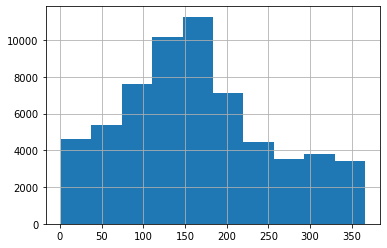

In [19]:
df.date.dt.dayofyear.hist()

<AxesSubplot:>

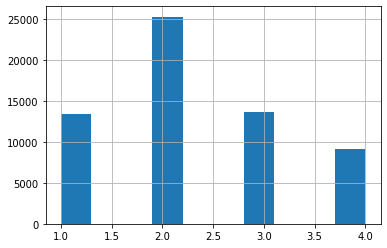

In [20]:
df.date.dt.quarter.hist()

<AxesSubplot:>

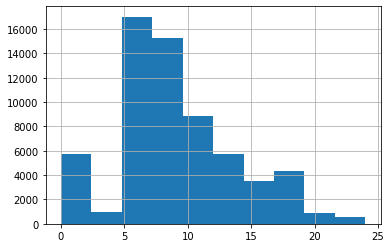

In [52]:
def get_hour(x):
    return int(x.split(":")[0]) if ":" in x  and "?" not in x and "xx" not in x else 0
hours = df.time.apply(get_hour)
hours.hist()

In [53]:
sampled = pd.Series(df.primary_label.unique()).sample(5)
sampled

248     pinsis
306     shicow
99      clcrob
215    mouela1
299     saypho
dtype: object

pinsis 150


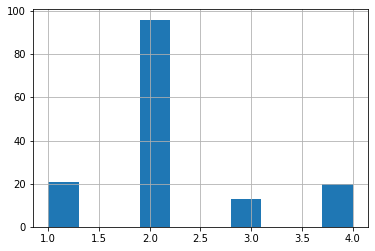

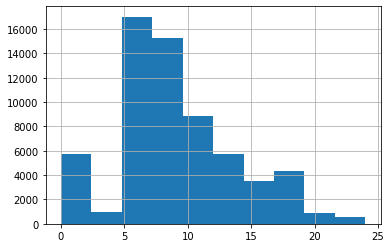

shicow 96


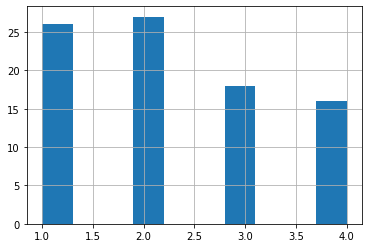

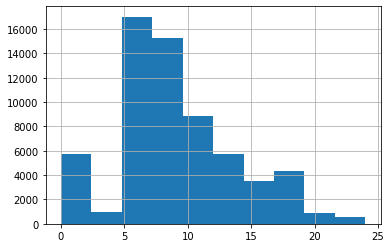

clcrob 195


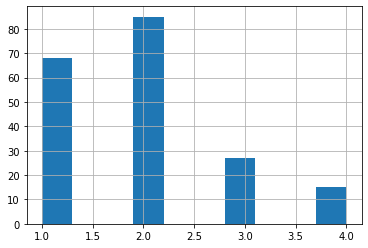

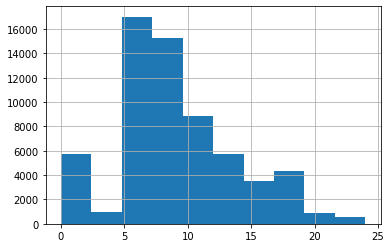

mouela1 102


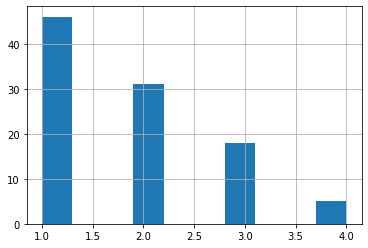

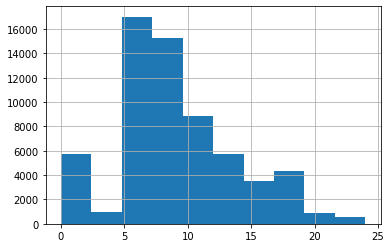

saypho 81


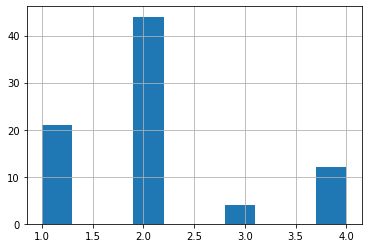

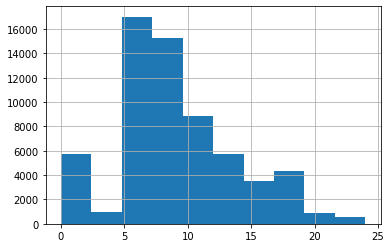

In [56]:
import matplotlib.pyplot as plt

for label in sampled:
    subset = df[df.primary_label == label]
    print(f"{label} {subset.shape[0]}")
    subset.date.dt.quarter.hist()
    plt.show()
    hours = df.time.apply(get_hour)
    hours.hist()
    plt.show()

In [69]:
import numpy as np
np.random.choice(np.arange(100), 100, replace=False)

array([10, 91, 52, 99,  9, 15, 68, 53, 19, 33, 72,  5, 23, 42, 97,  7,  3,
       17, 12, 36, 39, 82, 59, 65, 30,  6, 76, 75, 32, 61, 37, 67, 24, 71,
       89, 58, 18, 20, 74,  2, 81,  8, 60, 46, 29, 51, 55, 62,  1, 85, 54,
       66, 95, 56, 14, 69, 48,  4, 80, 25, 78, 84, 92, 77, 57, 38, 22, 16,
       44,  0, 83, 88, 34, 47, 50, 49, 35, 40, 43, 45, 41, 28, 87, 13, 21,
       63, 94, 27, 26, 98, 93, 70, 64, 11, 96, 79, 86, 73, 31, 90])